<a href="https://colab.research.google.com/github/CAMI2-bit/Ecuaciones-diferenciales-parciales/blob/main/Avances_ecuaci%C3%B3n_onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            ∞                                       
          _____                                     
          ╲                                         
           ╲           ⎛π⋅n⎞    ⎛π⋅n⋅x⎞    ⎛π⋅c⋅n⋅t⎞
            ╲   8⋅k⋅sin⎜───⎟⋅sin⎜─────⎟⋅cos⎜───────⎟
             ╲         ⎝ 2 ⎠    ⎝  L  ⎠    ⎝   L   ⎠
u(x, t) =    ╱  ────────────────────────────────────
            ╱                   2  2                
           ╱                   π ⋅n                 
          ╱                                         
          ‾‾‾‾‾                                     
          n = 1                                     

            ∞                                   
          _____                                 
          ╲                                     
           ╲         ⎛π⋅n⎞                      
            ╲   8⋅sin⎜───⎟⋅sin(π⋅n⋅x)⋅cos(π⋅n⋅t)
             ╲       ⎝ 2 ⎠                      
u(x, t) =    ╱  ────────────────────────────────
            ╱                 2  2              
           ╱                 π ⋅n               
          ╱                                     
          ‾‾‾‾‾                                 
          n = 1                                 

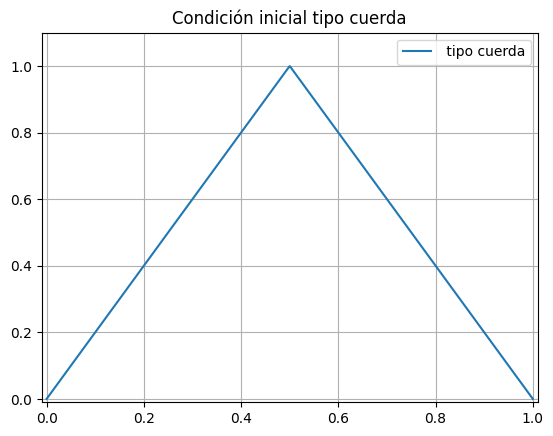

In [3]:
import sympy as sp
x, t, n, k, L, c = sp.symbols('x t n k L c', real=True, positive=True)
pi = sp.pi
a_n = (8*k)/(n**2*pi**2) * sp.sin(n*pi/2)
# Término general de la serie de Fourier
term_n = a_n * sp.sin(n*pi*x/L) * sp.cos(n*pi*c*t/L)
# Sumatoria infinita simbólica

#para los parametros {k:1, L:1, c:1})
u_xt = sp.Sum(term_n, (n, 1, sp.oo))

sp.init_printing(use_latex='mathjax')
display(sp.Eq(sp.Function('u')(x,t), u_xt))
u_xt_subs = u_xt.subs({k:1, L:1, c:1})
display(sp.Eq(sp.Function('u')(x,t), u_xt_subs))
from pylab import *
L=1
k=1
c=1
def cuerda(x):
    y = zeros(len(x))
    for i in range(len(x)):
        if x[i] < L/2:
            y[i] = (2*k/L)*x[i]
        else:
            y[i] = (2*k/L)*(L - x[i])
    return y


x = linspace(0, L, 1000)
f = cuerda(x)
#Grafica de la condicion inicial
plot(x, f, label=' tipo cuerda')
xlabel(''); ylabel('');
title("Condición inicial tipo cuerda")
xlim([-0.01, 1.01]), ylim([-0.01, 1.1]), grid(), legend()
show()
def coef_a_n(n):
    return (8*k)/(n**2 * pi**2) * sin(n * pi / 2)

def u_0(x, N=20):
    f = zeros(len(x))
    for n in range(1, N):
        a_n = coef_a_n(n)
        f += a_n * sin(n * pi * x / L)
    return f